## Activity - Analyzing Advertisements
it's time to put everything you've learned so far to test in the activity that follows.
**Activity 2.01**:
Your company has collated data on the advertisement views through various
mediums in a file called Advertising.csv. The advert campaign ran through
radio, TV, web, and newspaper, and you need to mine the data to answer the
following questions:
1. What are the unique values present in the Products column?
2. How many data points belong to each category in the Products column?
3. What are the total views across each category in the Products column?
4. Which product has the highest viewership on TV?
5. Which product has the lowest viewership on the web?

## Load the dataset and basic exploration

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [76]:
data = pd.read_csv("./Advertising.csv")
data.head()

Date Products     Web  Newspaper  Radio     TV
0  01/01/2018   Mobile  230100      69200  37800  22100
1  01/02/2018   Mobile   44500      45100  39300  10400
2  01/03/2018   Mobile   17200      69300  45900   9300
3  01/04/2018   Mobile  151500      58500  41300  18500
4  01/05/2018   Mobile  180800      58400  10800  12900

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       200 non-null    object
 1   Products   200 non-null    object
 2   Web        200 non-null    int64 
 3   Newspaper  200 non-null    int64 
 4   Radio      200 non-null    int64 
 5   TV         200 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 9.5+ KB


In [78]:
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")
data[['Web', 'Newspaper', 'Radio', 'TV']].astype(np.int32)
data['Products'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       200 non-null    datetime64[ns]
 1   Products   200 non-null    object        
 2   Web        200 non-null    int64         
 3   Newspaper  200 non-null    int64         
 4   Radio      200 non-null    int64         
 5   TV         200 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 9.5+ KB


In [79]:
data.head()

Date Products     Web  Newspaper  Radio     TV
0 2018-01-01   Mobile  230100      69200  37800  22100
1 2018-02-01   Mobile   44500      45100  39300  10400
2 2018-03-01   Mobile   17200      69300  45900   9300
3 2018-04-01   Mobile  151500      58500  41300  18500
4 2018-05-01   Mobile  180800      58400  10800  12900

In [80]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day_name()
data.head()

Date Products     Web  Newspaper  Radio     TV  Year  Month       Day
0 2018-01-01   Mobile  230100      69200  37800  22100  2018      1    Monday
1 2018-02-01   Mobile   44500      45100  39300  10400  2018      2  Thursday
2 2018-03-01   Mobile   17200      69300  45900   9300  2018      3  Thursday
3 2018-04-01   Mobile  151500      58500  41300  18500  2018      4    Sunday
4 2018-05-01   Mobile  180800      58400  10800  12900  2018      5   Tuesday

<Axes: xlabel='Products'>

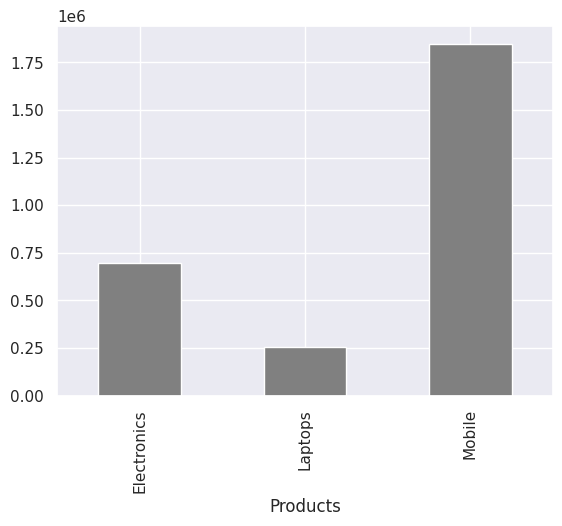

In [84]:
data.groupby('Products')['TV'].sum().plot(kind = 'bar', \
                                   y = 'TV',color='gray')


<Axes: xlabel='Products'>

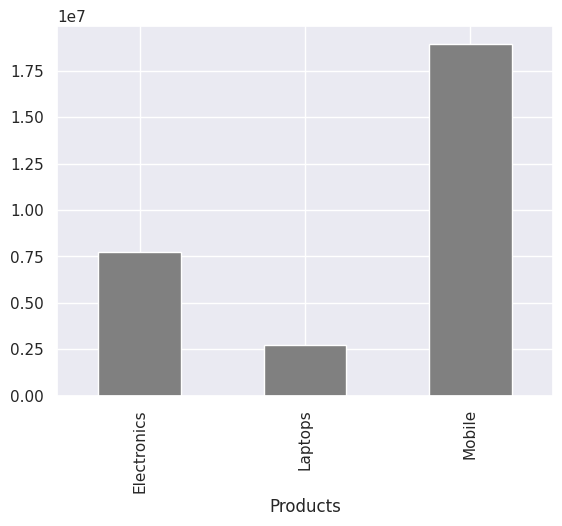

In [85]:
data.groupby('Products')['Web'].sum().plot(kind = 'bar', \
                                   y = 'Web',color='gray')

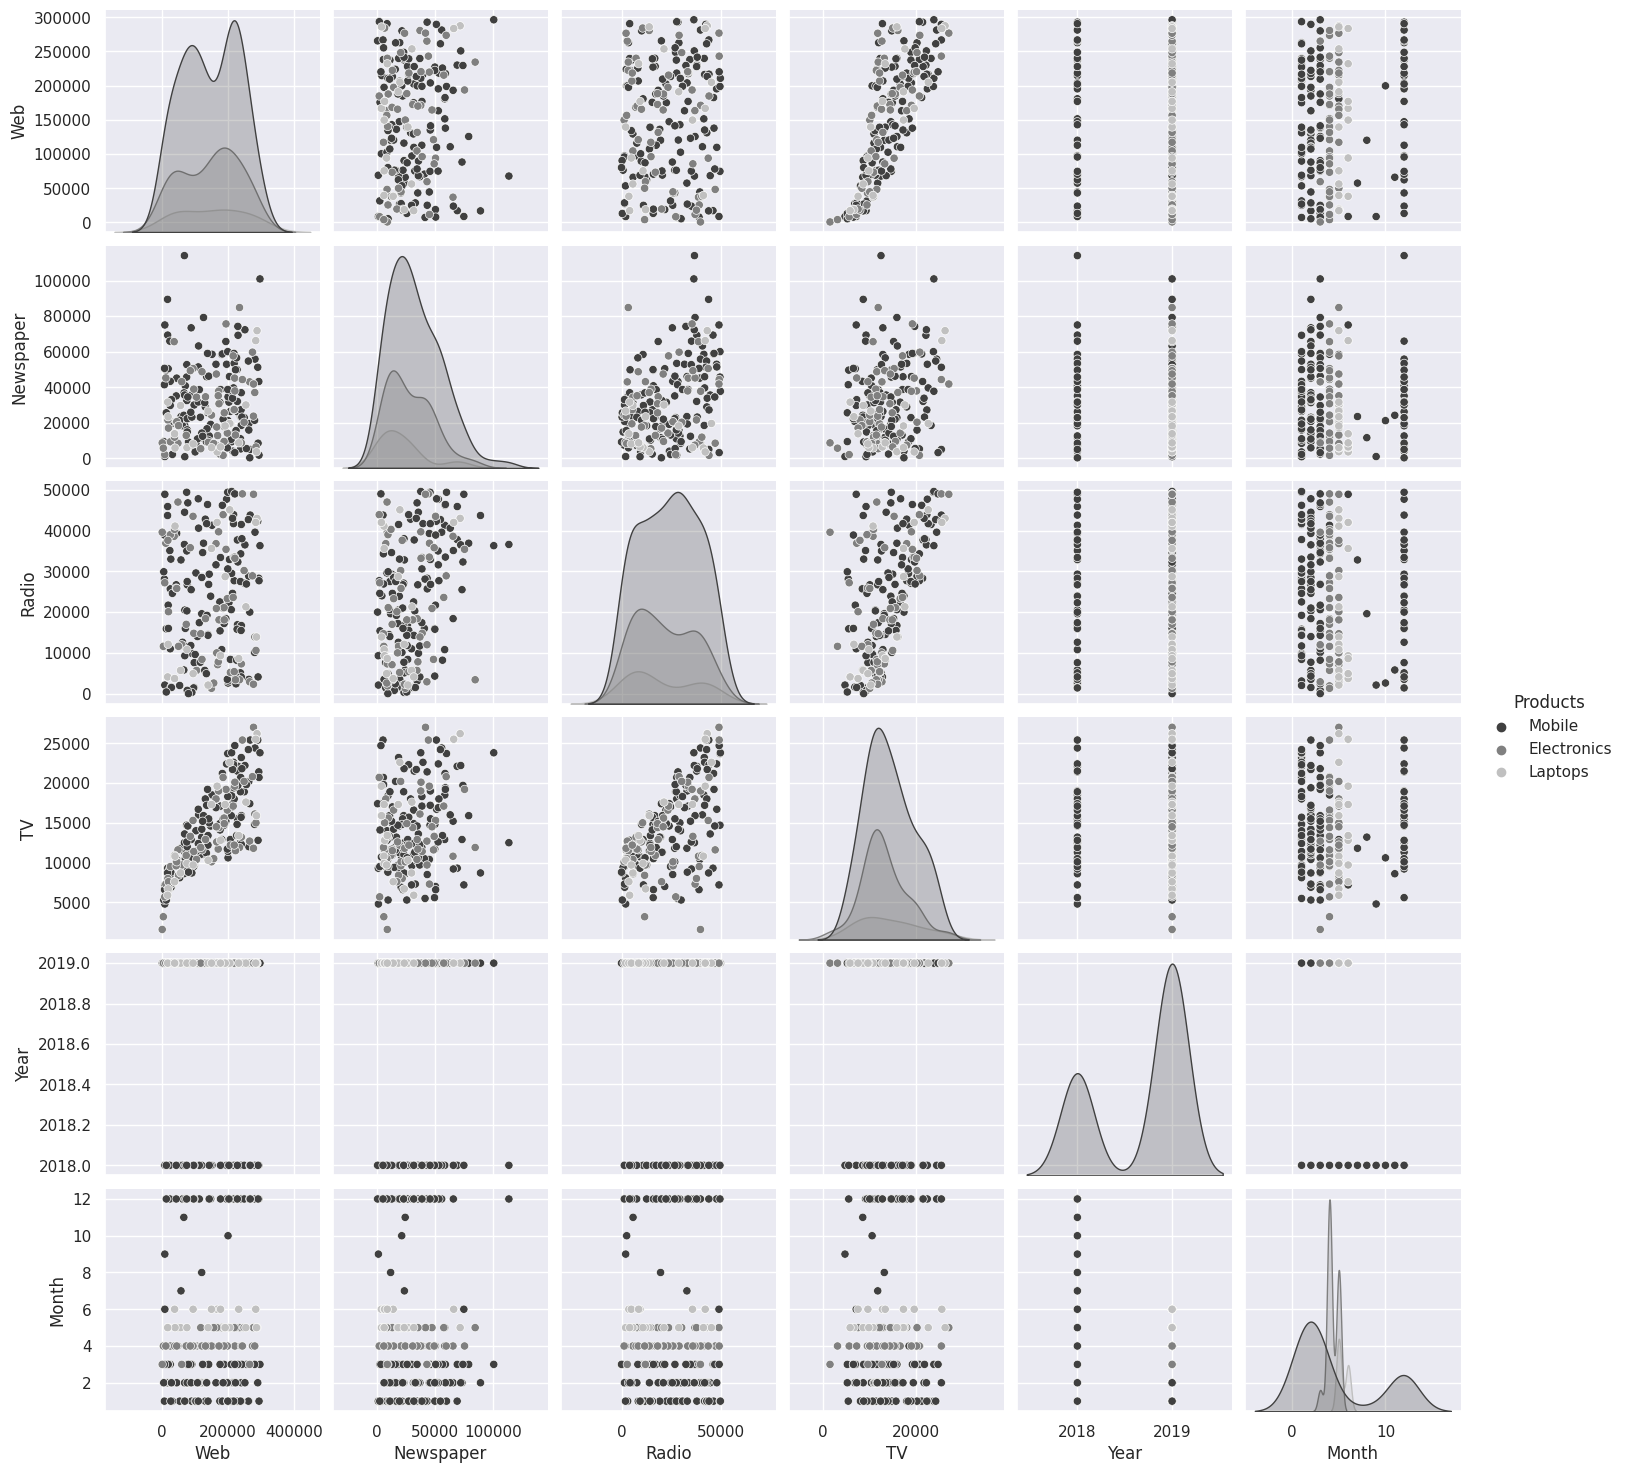

In [86]:
sns.pairplot(data, hue='Products', palette='gray')

## What are the unique values present in the Products column?

In [37]:
data['Products'].unique()

array(['Mobile', 'Electronics', 'Laptops'], dtype=object)

## How many data points belong to each category in the Products column?

In [40]:
data['Products'].value_counts()

Products
Mobile         129
Electronics     53
Laptops         18
Name: count, dtype: int64

## What are the total views across each category in the Products column?

In [43]:
data.groupby(['Products'])[['Web', 'Newspaper', 'Radio', 'TV']].sum()

Web  Newspaper    Radio       TV
Products                                          
Electronics   7734400    1500100  1161200   698300
Laptops       2711700     379200   374000   257800
Mobile       18962400    4231500  3117600  1848400

## Which product has the highest viewership on TV?

In [51]:
data.groupby('Products').agg({'TV': 'sum'}).sort_values(by='TV', ascending=False).iloc[0]

TV    1848400
Name: Mobile, dtype: int64

## Which product has the lowest viewership on the web?

In [52]:
data.groupby('Products').agg({'Web': 'sum'}).sort_values(by='Web', ascending=False).iloc[-1]

Web    2711700
Name: Laptops, dtype: int64